[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Ticker                            DB         DB         DB         DB   
Date                                                                    
2010-01-04 00:00:00+00:00  54.430897  69.875954  70.162216  68.893127   
2010-01-05 00:00:00+00:00  55.471493  71.211830  71.698471  70.610687   
2010-01-06 00:00:00+00:00  54.512650  69.980919  70.543892  69.494278   
2010-01-07 00:00:00+00:00  55.129581  70.772903  70.896950  69.809158   
2010-01-08 00:00:00+00:00  57.121593  73.330154  73.416031  72.509544   

Price                           Open  Volume  
Ticker                            DB      DB  
Date                                          
2010-01-04 00:00:00+00:00  69.103050  469504  
2010-01-05 00:00:00+00:00  71.412216  503354  
2010-01-06 00:00:00+00:00  69.847328  495075  
2010-01-07 00:00:00+00:00  70.133591  700169  
2010-01-08 00:00:00+00:00  72.891220  763992  


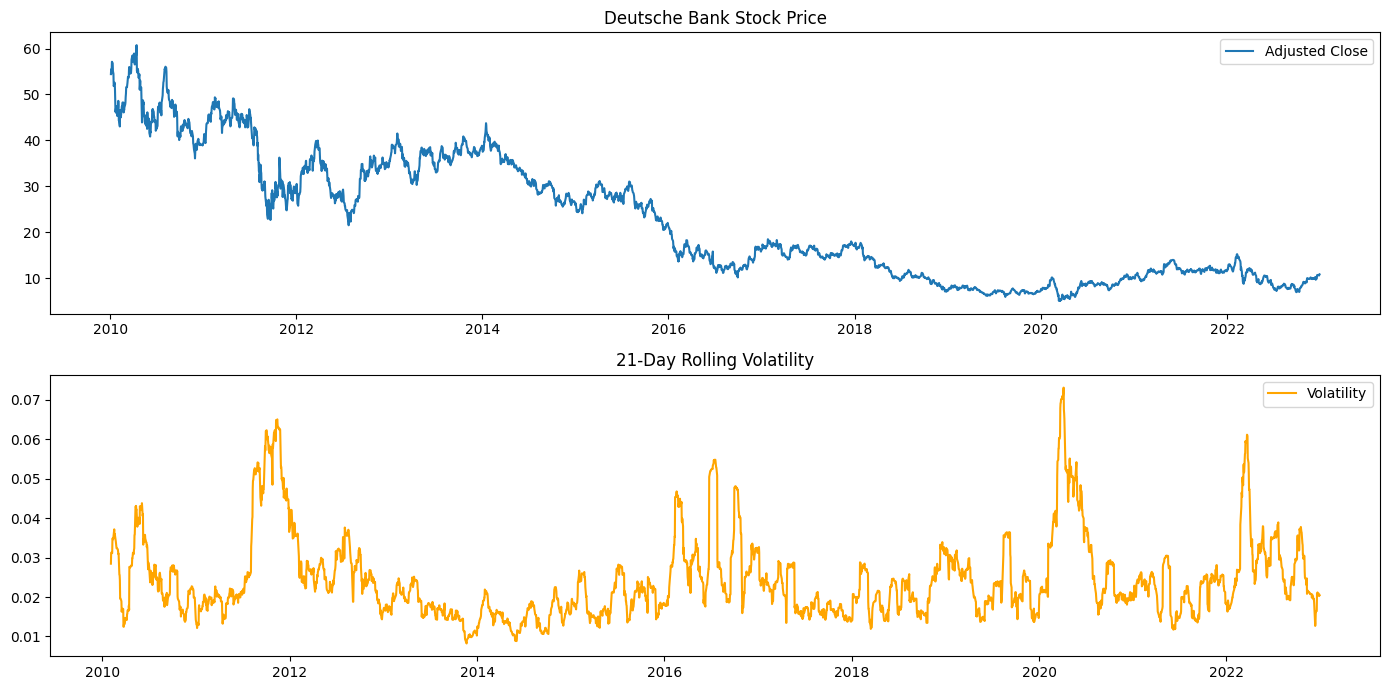


Training RNN model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1476
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0642e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0060e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.7527e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.8605e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7997e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7128e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6812e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4531e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0270e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5602e-04
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3705e-04
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2451e-04
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2444e-04
Epoch 15/50
80/80 ━━━━━━━━━━━━

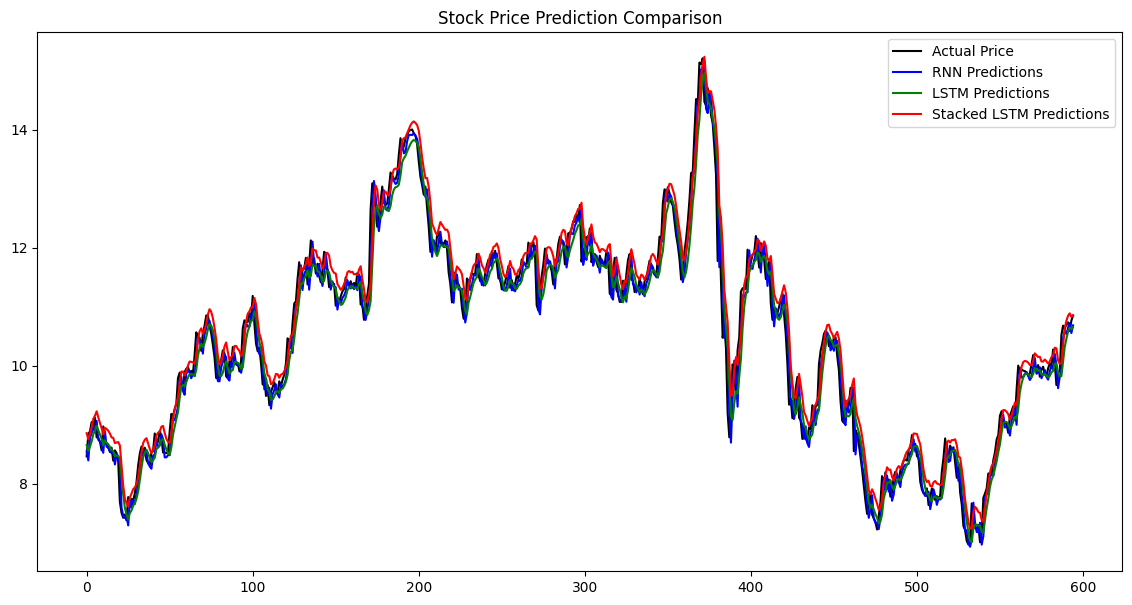

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Dense, Dropout

# Fetch data from Yahoo Finance
ticker = 'DB'
data = yf.download(ticker, start='2014-01-01', end='2023-01-01')

# Display the data
print(data.head())

# Preprocess the data
data['Return'] = data['Adj Close'].pct_change()
data['Log Return'] = np.log(1 + data['Return'])
data['Volatility'] = data['Log Return'].rolling(window=21).std()

# Plot the financial metrics
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adjusted Close')
plt.title('Deutsche Bank Stock Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Volatility'], label='Volatility', color='orange')
plt.title('21-Day Rolling Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# Prepare data for model training
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create dataset for RNN/LSTM input
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape data to fit RNN/LSTM requirements
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and compile RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Build and compile LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Build and compile stacked LSTM model
stacked_lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the models
epochs = 50
batch_size = 32

print("\nTraining RNN model...")
rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

print("\nTraining LSTM model...")
lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

print("\nTraining Stacked LSTM model...")
stacked_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the models
rnn_preds = rnn_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test)
stacked_lstm_preds = stacked_lstm_model.predict(X_test)

# Inverse scaling
rnn_preds = scaler.inverse_transform(rnn_preds)
lstm_preds = scaler.inverse_transform(lstm_preds)
stacked_lstm_preds = scaler.inverse_transform(stacked_lstm_preds)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Price', color='black')
plt.plot(rnn_preds, label='RNN Predictions', color='blue')
plt.plot(lstm_preds, label='LSTM Predictions', color='green')
plt.plot(stacked_lstm_preds, label='Stacked LSTM Predictions', color='red')
plt.title('Stock Price Prediction Comparison')
plt.legend()
plt.show()


In [7]:
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Build and compile Bidirectional LSTM model
bi_lstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Bidirectional LSTM model
print("\nTraining Bidirectional LSTM model...")
bi_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Predict using the Bidirectional LSTM model
bi_lstm_preds = bi_lstm_model.predict(X_test)
bi_lstm_preds = scaler.inverse_transform(bi_lstm_preds)

# Calculate metrics for all models
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, mae

# Gather metrics
metrics = {
    'Model': ['RNN', 'LSTM', 'Stacked LSTM', 'Bidirectional LSTM'],
    'MSE': [],
    'MAE': []
}

for model_name, predictions in [
    ('RNN', rnn_preds),
    ('LSTM', lstm_preds),
    ('Stacked LSTM', stacked_lstm_preds),
    ('Bidirectional LSTM', bi_lstm_preds)
]:
    mse, mae = calculate_metrics(y_test_actual, predictions)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)

# Convert to DataFrame for a tabular view
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

print("Model Performance Metrics:")
print(metrics_df)



Training Bidirectional LSTM model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1031
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0027
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0017
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0012
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0011
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0011
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 8.3651e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.8522e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 7.0464e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.8734e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 6.1123e-04
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.9426e-04
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 5.3336e-04
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 4.7947e-04
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/ste

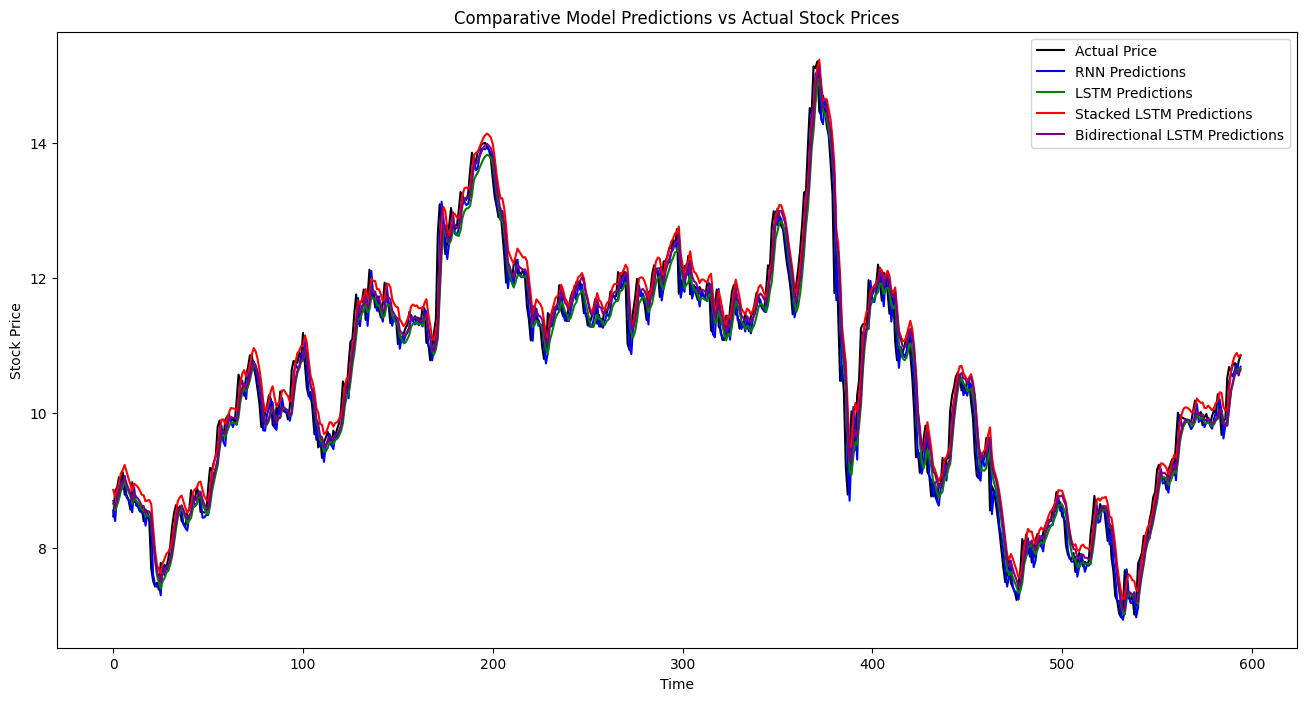

In [8]:
# Plot the actual stock prices and predictions from all models
plt.figure(figsize=(16, 8))

# Plot actual values
plt.plot(y_test_actual, label='Actual Price', color='black')

# Plot RNN predictions
plt.plot(rnn_preds, label='RNN Predictions', color='blue')

# Plot LSTM predictions
plt.plot(lstm_preds, label='LSTM Predictions', color='green')

# Plot Stacked LSTM predictions
plt.plot(stacked_lstm_preds, label='Stacked LSTM Predictions', color='red')

# Plot Bidirectional LSTM predictions
plt.plot(bi_lstm_preds, label='Bidirectional LSTM Predictions', color='purple')

# Add titles and labels
plt.title('Comparative Model Predictions vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()
